In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [4]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key,i.item_name,SUM(f.quantity)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " GROUP BY CUBE(s.store_key,i.item_name) " \
              "order by s.store_key, sum(f.quantity) DESC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', None, 8169),
 ('S0001', 'Pepsi - 12 oz cans', 92),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 90),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 78),
 ('S0001', 'Waterloo Sparkling Lime 12oz', 70),
 ('S0001', 'Njoy Sugar Canister 22 oz', 69),
 ('S0001', 'Vita Coconut Water 10oz ', 68),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', 67),
 ('S0001', 'Sprite - 12 oz cans', 64),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', 63),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', 62),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', 61),
 ('S0001', 'A&W Root Beer - 12 oz cans', 60),
 ('S0001', 'Dark Chocolate Mint Patties', 60),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', 60),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', 59),
 ('S0001', 'Large Trash Bags Black 33 gal', 59),
 ('S0001', 'Kellogg Fun Mix Cheez it, Prngls, Fam Amos', 58),
 ('S0001', 'Quaker Instant Oatmeal Maple Brn Sugar', 57),
 ('S0001', 'Frito Bold Flavors Variety', 56),
 ('S000

In [5]:
df = pd.DataFrame(list(records), columns=['Store_key', 'Item_name' ,'Quantity'])
df.head(10)

,Store_key,Item_name,Quantity
0,S0001,None,8169
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
5,S0001,Njoy Sugar Canister 22 oz,69
6,S0001,Vita Coconut Water 10oz,68
7,S0001,Muscle Milk Protein Shake Strbry. 11oz,67
8,S0001,Sprite - 12 oz cans,64
9,S0001,Cheez It White Cheddar 1.5 oz,63


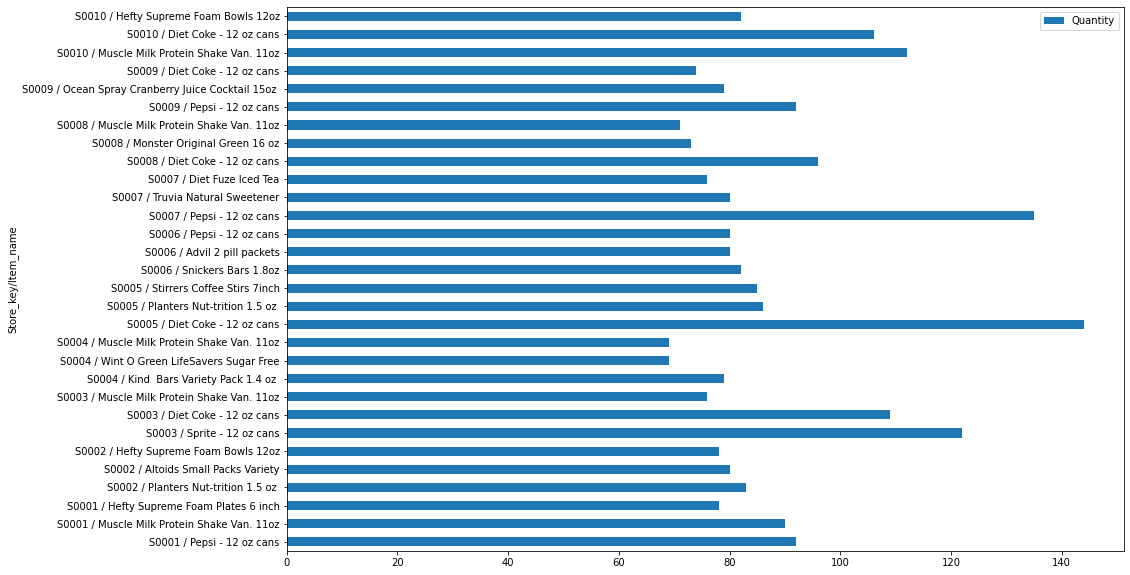

In [6]:
df=df.dropna()
df = df.groupby('Store_key').head(3)
df= df.head(30)
df['Quantity'] = df['Quantity'].astype('int64')
df['Store_key/Item_name'] = df['Store_key'] + ' / ' + df['Item_name']
fig = df.plot.barh(x='Store_key/Item_name', y='Quantity', figsize=(15,10), rot=0)

### TOP Ten Stores based on item quantity

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key ,i.item_name,SUM(f.quantity) as Quantity" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              " GROUP BY (s.store_key,i.item_name) "\
              "Order by Quantity DESC "\
              "LIMIT 10"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S00348', 'Diet Coke - 12 oz cans', 167),
 ('S0022', 'Coke Classic 12 oz cans', 155),
 ('S00436', 'Coke Classic 12 oz cans', 153),
 ('S00345', 'Coke Classic 12 oz cans', 147),
 ('S00669', 'Sprite - 12 oz cans', 146),
 ('S0005', 'Diet Coke - 12 oz cans', 144),
 ('S00431', 'Muscle Milk Protein Shake Van. 11oz', 142),
 ('S00676', 'Muscle Milk Protein Shake Van. 11oz', 141),
 ('S00508', 'Coke Classic 12 oz cans', 140),
 ('S00517', 'Diet Coke - 12 oz cans', 138)]

In [10]:
df1 = pd.DataFrame(list(records), columns=['Store_key', 'Item_name' ,'Quantity'])
df1.head(10)

,Store_key,Item_name,Quantity
0,S00348,Diet Coke - 12 oz cans,167
1,S0022,Coke Classic 12 oz cans,155
2,S00436,Coke Classic 12 oz cans,153
3,S00345,Coke Classic 12 oz cans,147
4,S00669,Sprite - 12 oz cans,146
5,S0005,Diet Coke - 12 oz cans,144
6,S00431,Muscle Milk Protein Shake Van. 11oz,142
7,S00676,Muscle Milk Protein Shake Van. 11oz,141
8,S00508,Coke Classic 12 oz cans,140
9,S00517,Diet Coke - 12 oz cans,138


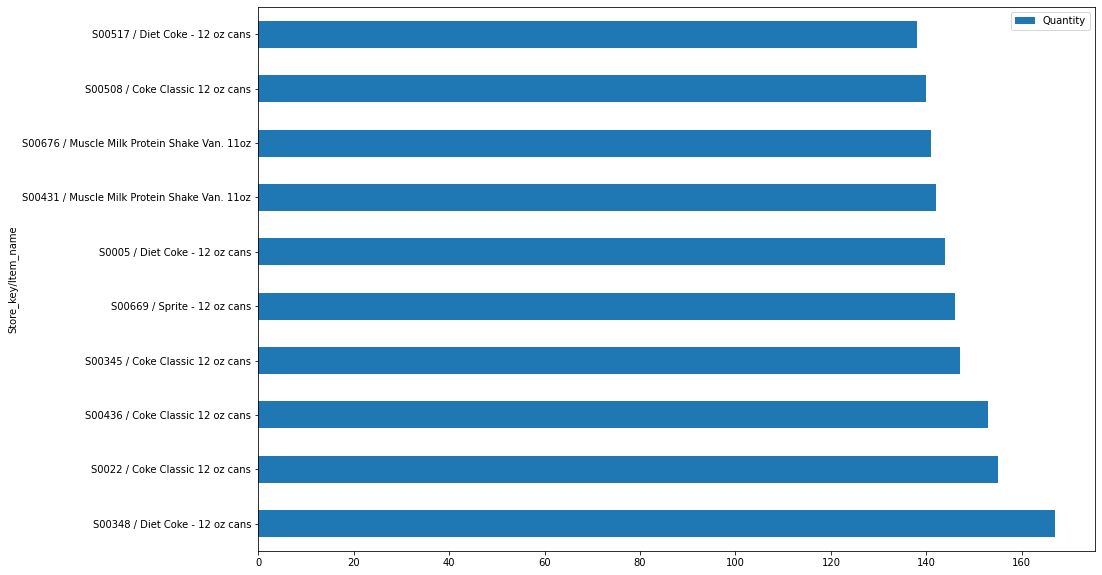

In [12]:
df1=df1.dropna()
df1 = df1.groupby('Store_key').head(3)
df1= df1.head(30)
df1['Quantity'] = df1['Quantity'].astype('int64')
df1['Store_key/Item_name'] = df1['Store_key'] + ' / ' + df1['Item_name']
fig = df1.plot.barh(x='Store_key/Item_name', y='Quantity', figsize=(15,10), rot=0)

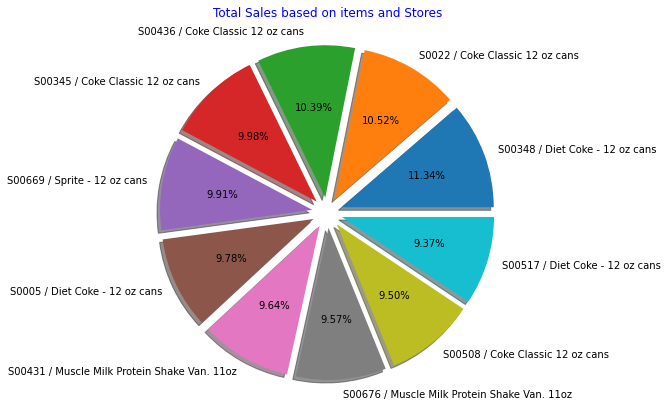

In [14]:
labels=df1['Store_key/Item_name']
data = df1['Quantity']
textprops = {"fontsize":10}
plt.title('Total Sales based on items and Stores',loc='center',color='b')
plt.pie(data, labels=labels, shadow = True, textprops = textprops , autopct='%.2f%%',explode=(0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1))
plt.rcParams["figure.figsize"] = (20,10)
plt.show()